In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[1.series](#series)

[2.dataframe](#dataframe)

[3.get_dummies](#get_dummies)

[4.corr](#corr)

[5.groups](#groups)

[6.transform](#transform)

[7.pivot_table](#pivot_table)

[8.level=(index)](#level=(index))

[9.stack/unstack](#stack/unstack)

[10.concat](#concat)

[11.merge](#merge)

## series

In [2]:
# 정수값 데이터 생성
s1 = pd.Series([1, 2, 3])
s1

0    1
1    2
2    3
dtype: int64

In [3]:
# 문자열 데이터 생성
s2 = pd.Series(['a', 'b', 'c'])
s2

0    a
1    b
2    c
dtype: object

In [4]:
# 범위를 통한 데이터 생성
s3 = pd.Series(np.arange(200))
s3

0        0
1        1
2        2
3        3
4        4
      ... 
195    195
196    196
197    197
198    198
199    199
Length: 200, dtype: int64

In [5]:
# inex 값을 만들어 데이터 생성
# pd.Series([data_values], [index_values])

s4 = pd.Series([1, 2, 3], [100, 200, 300])
s4

100    1
200    2
300    3
dtype: int64

In [6]:
s5 = pd.Series([1, 2, 3], ['a', 'm', 'k'])
s5

a    1
m    2
k    3
dtype: int64

In [7]:
# 데이터 타입을 정해서 데이터 생성
s6 = pd.Series(np.arange(5), np.arange(100,105), dtype = np.int16)
s6

100    0
101    1
102    2
103    3
104    4
dtype: int16

### Series size, shape, unique, count, value_counts 함수
- size : 개수 반환
- shape : 튜플 형태로 shape 반환
- unique : 유일한 값만 ndarray로 반환
- count : NaN을 제외한 개수 반환
- mean : NaN을 제외한 평균
- value_counts : NaN을 제외하고 각 값들의 빈도를 반환 

In [8]:
# 데이터 값의 수가 다른 두 데이터의 연산 

s = pd.Series([1, 1, 2, 1, 2, 2, 2, 1, 1, 3, 3, 4, 5, 5, 7, np.NaN])
s1 = pd.Series([1, 2, 3, 4, 5, 6])

s + s1

0     2.0
1     3.0
2     5.0
3     5.0
4     7.0
5     8.0
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
dtype: float64

In [9]:
# bool값을 이용한 조건 값 계산

s = pd.Series(np.arange(10), np.arange(10)+1)
(s >= 7).sum()

3

In [10]:
# 조건으로 데이터 계산

s = pd.Series(np.arange(10), np.arange(10)+1)
s[(s >= 7)].sum()

24

In [11]:
# 특정 값의 데이터 변경

s = pd.Series(np.arange(100, 105), ['a', 'b', 'c', 'd', 'e'])
s[['a', 'c']] = [300, 900]
s

a    300
b    101
c    900
d    103
e    104
dtype: int64

In [12]:
s['a'] = 400
s

a    400
b    101
c    900
d    103
e    104
dtype: int64

In [13]:
# 특정 범위의 데이터 값 출력

s2 = pd.Series(np.arange(100, 105), ['a', 'b', 'c', 'd', 'e'])
s2['b':'d']

b    101
c    102
d    103
dtype: int64

## dataframe

In [14]:
# Series 데이터를 묶어서 인덱스 [100, 101, 102]의 데이터 생성

a = pd.Series([110, 200, 300], ['a', 'b', 'c'])
b = pd.Series([111, 201, 301], ['a', 'b', 'c'])
c = pd.Series([112, 202, 302], ['a', 'b', 'c'])

result = pd.DataFrame([a, b, c], [100, 101, 102])
result

,a,b,c
100,110,200,300
101,111,201,301
102,112,202,302


In [15]:
# 데이터에서 필요한 index와 사용할 col의 데이터를 출력

train_data = pd.read_csv('../train.csv', index_col = 'PassengerId', usecols=['PassengerId', 'Survived', 'Pclass', 'Name', 'Age'])
train_data

,Survived,Pclass,Name,Age
PassengerId,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,1,3,"Heikkinen, Miss. Laina",26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,0,3,"Allen, Mr. William Henry",35.0
...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0
888,1,1,"Graham, Miss. Margaret Edith",19.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN


In [16]:
# 특정 열의 데이터 값 출력

train_data[['Survived', 'Pclass']]

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


In [17]:
train_data.loc[:, ['Survived', 'Pclass']]

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


In [18]:
train_data.iloc[:, [0,1]]

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


In [19]:
# 불러온 데이터에서 특정 열의 특정 값을 조건을 사용하여 데이터 출력

Pclass = (train_data['Pclass'] == 1)
Age1 = (train_data['Age'] >= 30)
Age2 = (train_data['Age'] < 40)

train_data[Pclass & Age1 & Age2]

,Survived,Pclass,Name,Age
PassengerId,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
62,1,1,"Icard, Miss. Amelie",38.0
138,0,1,"Futrelle, Mr. Jacques Heath",37.0
216,1,1,"Newell, Miss. Madeleine",31.0
219,1,1,"Bazzani, Miss. Albina",32.0
225,1,1,"Hoyt, Mr. Frederick Maxfield",38.0
231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0
249,1,1,"Beckwith, Mr. Richard Leonard",37.0


In [20]:
df = pd.read_csv('../train.csv')

age_mean = df['Age'].mean()

df['Age'].fillna(age_mean)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [21]:
# 생존자의 평균 연령을 구하여라

survived_age = df[['Survived', 'Age']]
survived_age[df['Survived']==1].mean()

train_data[train_data['Survived'] == 1]['Age'].mean()

28.343689655172415

## get_dummies

In [22]:
# one hot encoding

train_data = pd.read_csv('../train.csv')
train_data.head()

pd.get_dummies(train_data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# 특정 열의 값들을 열로 추가해서 데이터 표현하기

pd.get_dummies(train_data, columns=['Pclass', 'Survived', 'Embarked'])

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Survived_0,Survived_1,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0,1,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,0,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,1,0,1,0,0,0,1
887,888,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1,0,0,0,1,0,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,0,1
889,890,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0


In [24]:
# drop_first 는 첫번째 범주의 값의 열을 제거하고 나머지 값들만 열로 추출해서 출력 

pd.get_dummies(train_data, columns=['Pclass', 'Survived', 'Embarked'], drop_first=True)

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Survived_1,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1,0,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1,0,0,0,1
887,888,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1
889,890,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0,1,0,0


## corr

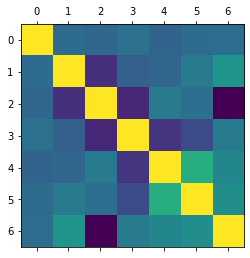

In [25]:
# 데이터 간의 상관관계를 표시 

train_data = pd.read_csv('../train.csv')
train_data.head()

corr = train_data.corr()

plt.matshow(corr)

## groups

In [26]:
# groups 속성

train_data = pd.read_csv('../train.csv')

class_group = train_data.groupby('Pclass')
class_group.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

### grouping 함수
- 그룹 데이터에 적용 가능한 통계 함수(NaN은 제외한 연산)
- count : 데이터 개수
- sum : 데이터 합
- mean, std, var : 평균, 표준편차, 분산
- min, max : 최소, 최대

In [27]:
class_group.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [28]:
class_group.sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [29]:
class_group.mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [30]:
# 성별 생존율

train_data.groupby(['Sex']).Survived.mean()
# = train_data.groupby(['Sex])['Survived].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [31]:
# 여러 컬럼을 묶어서 특정 값 구하기

train_data.groupby(['Pclass', 'Age']).mean()

PassengerId  Survived  SibSp  Parch      Fare
Pclass Age                                                 
1      0.92         306.0       1.0    1.0    2.0  151.5500
       2.00         298.0       0.0    1.0    2.0  151.5500
       4.00         446.0       1.0    0.0    2.0   81.8583
       11.00        803.0       1.0    1.0    2.0  120.0000
       14.00        436.0       1.0    1.0    2.0  120.0000
...                   ...       ...    ...    ...       ...
3      61.00        327.0       0.0    0.0    0.0    6.2375
       63.00        484.0       1.0    0.0    0.0    9.5875
       65.00        281.0       0.0    0.0    0.0    7.7500
       70.50        117.0       0.0    0.0    0.0    7.7500
       74.00        852.0       0.0    0.0    0.0    7.7750

[182 rows x 5 columns]

In [32]:
# loc를 활용하여 묶은 열들의 조건 값 구하기

train_data.groupby(['Pclass', 'Sex']).mean().loc[(2, 'female')]

PassengerId    443.105263
Survived         0.921053
Age             28.722973
SibSp            0.486842
Parch            0.605263
Fare            21.970121
Name: (2, female), dtype: float64

In [33]:
# index를 활용한 groupby

train_data.set_index('Pclass')

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
3,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
3,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [34]:
train_data.set_index(['Pclass', 'Sex'])

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,Sex,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S


## transform

In [35]:
train_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [36]:
train_data.groupby('Pclass').transform(np.mean)

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
3,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
4,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
...,...,...,...,...,...,...
886,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
887,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
888,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
889,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687


## pivot_table

In [37]:
df = pd.DataFrame({
    '지역' : ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기'],
    '요일' : ['월요일', '화요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량' : [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률' : [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
})
df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [38]:
# 지역을 기준으로 요일 확인하기
df.pivot(index='지역', columns='요일')

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [39]:
df.pivot(index='요일', columns='지역')

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

In [40]:
df.pivot(index='요일', columns='지역', values='강수량')

지역,경기,부산,서울
요일,,,
금요일,100.0,NaN,100.0
목요일,50.0,NaN,50.0
수요일,100.0,NaN,1000.0
월요일,200.0,100.0,100.0
화요일,200.0,200.0,80.0


In [41]:
df.pivot(index='요일', columns='지역', values='강수확률')

지역,경기,부산,서울
요일,,,
금요일,10.0,NaN,90.0
목요일,50.0,NaN,50.0
수요일,80.0,NaN,90.0
월요일,10.0,30.0,80.0
화요일,20.0,20.0,70.0


In [42]:
# 중복된 데이터 추가
df2 = pd.DataFrame({
    '지역' : ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기'],
    '요일' : ['월요일', '월요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량' : [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률' : [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
})
df2

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,월요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [43]:
pd.pivot_table(df2, index='요일', columns='지역', aggfunc=np.mean)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0    90.0  10.0  30.0  75.0
화요일  200.0  200.0     NaN  20.0  20.0   NaN

## level = (index)

In [44]:
train_data.set_index('Age').groupby(level=0).mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,0.5,0.5,40.7500
70.50,117.0,0.0,3.0,0.0,0.0,7.7500
71.00,295.5,0.0,1.0,0.0,0.0,42.0792


In [45]:
# groupby 내부 함수 사용

import math
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age / 10) * 10

train_data.set_index('Age').groupby(age_categorize).mean()['Survived']

-1     0.293785
 0     0.612903
 10    0.401961
 20    0.350000
 30    0.437126
 40    0.382022
 50    0.416667
 60    0.315789
 70    0.000000
 80    1.000000
Name: Survived, dtype: float64

In [46]:
# multi_index를 통해서 구하는 법

train_data.set_index(['Pclass', 'Sex']).groupby(level=[0, 1]).mean()['Age']

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [47]:
train_data.set_index(['Pclass', 'Sex']).groupby(level=[0, 1]).aggregate([np.mean, np.sum, np.max])

PassengerId               Survived                 Age           \
                     mean     sum amax      mean sum amax       mean      sum   
Pclass Sex                                                                      
1      female  469.212766   44106  888  0.968085  91    1  34.611765  2942.00   
       male    455.729508   55599  890  0.368852  45    1  41.281386  4169.42   
2      female  443.105263   33676  881  0.921053  70    1  28.722973  2125.50   
       male    447.962963   48380  887  0.157407  17    1  30.740707  3043.33   
3      female  399.729167   57561  889  0.500000  72    1  21.750000  2218.50   
       male    455.515850  158064  891  0.135447  47    1  26.507589  6706.42   

                        SibSp               Parch                  Fare  \
               amax      mean  sum amax      mean  sum amax        mean   
Pclass Sex                                                                
1      female  63.0  0.553191   52    3  0.457447   43    2  106.125798   
       male    80.0  0.311475   38    3  0.278689   34    4   67.226127   
2      female  57.0  0.486842   37    3  0.605263   46    3   21.970121   
       male    70.0  0.342593   37    2  0.222222   24    2   19.741782   
3      female  63.0  0.895833  129    8  0.798611  115    6   16.118810   
       male    74.0  0.498559  173    8  0.224784   78    5   12.661633   

                                    
                     sum      amax  
Pclass Sex                          
1      female  9975.8250  512.3292  
       male    8201.5875  512.3292  
2      female  1669.7292   65.0000  
       male    2132.1125   73.5000  
3      female  2321.1086   69.5500  
       male    4393.5865   69.5500

## stack / unstack

- stack : 칼럼 레벨에서 인덱스 레벨로 dataframe 변경.
즉, 데이터를 쌓아올리는 개념으로 이해.
- unstack : 인덱스 레벨에서 칼럼 레벨로 dataframe 변경.
stack의 반대 operation.
둘은 역관계.

In [48]:
df = pd.DataFrame({
    '지역' : ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기'],
    '요일' : ['월요일', '화요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량' : [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률' : [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
})
df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [49]:
new_df = df.set_index(['지역', '요일'])
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

In [50]:
new_df.unstack(0)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

In [51]:
new_df.unstack(1)

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [52]:
new_df.unstack(0).stack(0)

지역           경기     부산      서울
요일                            
금요일 강수량   100.0    NaN   100.0
    강수확률   10.0    NaN    90.0
목요일 강수량    50.0    NaN    50.0
    강수확률   50.0    NaN    50.0
수요일 강수량   100.0    NaN  1000.0
    강수확률   80.0    NaN    90.0
월요일 강수량   200.0  100.0   100.0
    강수확률   10.0   30.0    80.0
화요일 강수량   200.0  200.0    80.0
    강수확률   20.0   20.0    70.0

In [53]:
new_df.unstack(0).stack(1)

강수량  강수확률
요일  지역              
금요일 경기   100.0  10.0
    서울   100.0  90.0
목요일 경기    50.0  50.0
    서울    50.0  50.0
수요일 경기   100.0  80.0
    서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    부산   200.0  20.0
    서울    80.0  70.0

## concat

### concat = 데이터 병합

In [54]:
# df1에 df2 이어 붙이기

df1 = pd.DataFrame({
    'key1' : np.arange(10),
    'value1' : np.random.randn(10),
})

df2 = pd.DataFrame({
    'key1' : np.arange(10),
    'value1' : np.random.randn(10)
})

pd.concat([df1, df2])

,key1,value1
0,0,-1.942644
1,1,-1.073932
2,2,-0.301682
3,3,0.203195
4,4,1.089202
5,5,0.347245
6,6,-0.771346
7,7,-1.436645
8,8,-1.182444
9,9,-0.312644


In [55]:
pd.concat([df1, df2], ignore_index=True)

,key1,value1
0,0,-1.942644
1,1,-1.073932
2,2,-0.301682
3,3,0.203195
4,4,1.089202
5,5,0.347245
6,6,-0.771346
7,7,-1.436645
8,8,-1.182444
9,9,-0.312644


In [56]:
pd.concat([df1, df2], axis=1) # 열 레벨 병합

,key1,value1,key1,value1
0,0,-1.942644,0,0.201916
1,1,-1.073932,1,-0.609363
2,2,-0.301682,2,-0.972960
3,3,0.203195,3,-0.604596
4,4,1.089202,4,-0.263239
5,5,0.347245,5,0.786794
6,6,-0.771346,6,0.599590
7,7,-1.436645,7,-1.249790
8,8,-1.182444,8,1.189390
9,9,-0.312644,9,-0.252178


In [57]:
df3 = pd.DataFrame({
    'key2' : np.arange(10),
    'value2' : np.random.randn(10),
})

pd.concat([df1, df3])

,key1,value1,key2,value2
0,0.0,-1.942644,NaN,NaN
1,1.0,-1.073932,NaN,NaN
2,2.0,-0.301682,NaN,NaN
3,3.0,0.203195,NaN,NaN
4,4.0,1.089202,NaN,NaN
5,5.0,0.347245,NaN,NaN
6,6.0,-0.771346,NaN,NaN
7,7.0,-1.436645,NaN,NaN
8,8.0,-1.182444,NaN,NaN
9,9.0,-0.312644,NaN,NaN


In [58]:
pd.concat([df1, df3], axis=1)

,key1,value1,key2,value2
0,0,-1.942644,0,-0.359050
1,1,-1.073932,1,-0.321062
2,2,-0.301682,2,-1.413985
3,3,0.203195,3,-0.566989
4,4,1.089202,4,-0.302688
5,5,0.347245,5,-1.711028
6,6,-0.771346,6,-0.595188
7,7,-1.436645,7,0.182622
8,8,-1.182444,8,0.170992
9,9,-0.312644,9,-1.046098


## merge

### DataFrame
  - SQL의 join처럼 특정한 column을 기준으로 병합
    - join 방식 : how 파라미터를 통해서 명시
      - inner : 기본값, 일치하는 값이 있는 경우
      - left : left outer join
      - right : right outer join
      - outer : full outer join
- pandas.merge 함수가 사용됨

- on 
  - join 대상이 된느 column 명시

In [59]:
customer = pd.DataFrame({
    'customer_id' : np.arange(6),
    'name' : ['철수', '영희', '길동', '영수', '수민', '진혁'],
    '나이' : [40, 20, 21, 30, 31, 18],
})

orders = pd.DataFrame({
    'customer_id' : [1, 1, 3, 3, 2, 2, 2, 1, 4, 9],
    'item' : ['치약', '칫솔', '이어폰', '헤드셋', '수건', '생수', '수건', '치약', '생수', '케이스'],
    'quantity' : [1, 2, 1, 1, 3, 2, 2, 3, 2, 1]
})



In [60]:
pd.merge(customer, orders, on='customer_id')

,customer_id,name,나이,item,quantity
0,1,영희,20,치약,1
1,1,영희,20,칫솔,2
2,1,영희,20,치약,3
3,2,길동,21,수건,3
4,2,길동,21,생수,2
5,2,길동,21,수건,2
6,3,영수,30,이어폰,1
7,3,영수,30,헤드셋,1
8,4,수민,31,생수,2


In [61]:
pd.merge(customer, orders, on='customer_id', how='inner')

,customer_id,name,나이,item,quantity
0,1,영희,20,치약,1
1,1,영희,20,칫솔,2
2,1,영희,20,치약,3
3,2,길동,21,수건,3
4,2,길동,21,생수,2
5,2,길동,21,수건,2
6,3,영수,30,이어폰,1
7,3,영수,30,헤드셋,1
8,4,수민,31,생수,2


In [62]:
pd.merge(customer, orders, on='customer_id', how='left')

,customer_id,name,나이,item,quantity
0,0,철수,40,NaN,NaN
1,1,영희,20,치약,1.0
2,1,영희,20,칫솔,2.0
3,1,영희,20,치약,3.0
4,2,길동,21,수건,3.0
5,2,길동,21,생수,2.0
6,2,길동,21,수건,2.0
7,3,영수,30,이어폰,1.0
8,3,영수,30,헤드셋,1.0
9,4,수민,31,생수,2.0


In [63]:
pd.merge(customer, orders, on='customer_id', how='right')

,customer_id,name,나이,item,quantity
0,1,영희,20.0,치약,1
1,1,영희,20.0,칫솔,2
2,1,영희,20.0,치약,3
3,3,영수,30.0,이어폰,1
4,3,영수,30.0,헤드셋,1
5,2,길동,21.0,수건,3
6,2,길동,21.0,생수,2
7,2,길동,21.0,수건,2
8,4,수민,31.0,생수,2
9,9,NaN,NaN,케이스,1


In [64]:
pd.merge(customer, orders, on='customer_id', how='outer')

,customer_id,name,나이,item,quantity
0,0,철수,40.0,NaN,NaN
1,1,영희,20.0,치약,1.0
2,1,영희,20.0,칫솔,2.0
3,1,영희,20.0,치약,3.0
4,2,길동,21.0,수건,3.0
5,2,길동,21.0,생수,2.0
6,2,길동,21.0,수건,2.0
7,3,영수,30.0,이어폰,1.0
8,3,영수,30.0,헤드셋,1.0
9,4,수민,31.0,생수,2.0


In [65]:
cust1 = customer.set_index('customer_id')

order1 = orders.set_index('customer_id')

pd.merge(cust1, order1, left_index=True, right_index=True)

,name,나이,item,quantity
customer_id,,,,
1,영희,20,치약,1
1,영희,20,칫솔,2
1,영희,20,치약,3
2,길동,21,수건,3
2,길동,21,생수,2
2,길동,21,수건,2
3,영수,30,이어폰,1
3,영수,30,헤드셋,1
4,수민,31,생수,2


In [66]:
# 많이 구입한 항목 구하기 

pd.merge(customer, orders, on='customer_id').groupby('item').sum().sort_values('quantity', ascending=False)

,customer_id,나이,quantity
item,,,
수건,4,42,5
생수,6,52,4
치약,2,40,4
칫솔,1,20,2
이어폰,3,30,1
헤드셋,3,30,1


In [67]:
# 많은 물건을 구입한 사람 구하기

pd.merge(customer, orders, on='customer_id').groupby(['name', 'item']).sum().loc['영희']

,customer_id,나이,quantity
item,,,
치약,2,40,4
칫솔,1,20,2
